In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER's SentimentIntensityAnalyzer() tokes in a string and returns a dictionary of scores in each of four categories:

* Negative
* Neutral
* Positive
Compound (computed by normalizing the scores above)

In [3]:
a = 'This was a good movie'
b = 'The was the best, most awesome movie EVER MADE!!!'
c = 'This was the worst film to ever disgrace the screen.'

print(sid.polarity_scores(a))
print(sid.polarity_scores(b))
print(sid.polarity_scores(c))

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}
{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8074}


# Use VADER to analyze Amazon Reviews

In [4]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

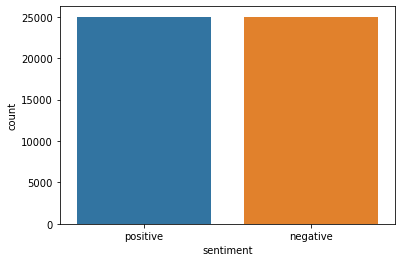

In [5]:
sns.countplot(x='sentiment', data=data)

In [6]:
data['scores'] = data['review'].apply(lambda review: sid.polarity_scores(review))

In [7]:
data.head()

,review,sentiment,scores
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co..."
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co..."
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co..."
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co..."


In [8]:
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')

In [9]:
data.head()

,review,sentiment,scores,compound,comp_score
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951,negative
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605,positive
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744,positive


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(data['sentiment'], data['comp_score'])

0.69548

In [11]:
confusion_matrix(data['sentiment'], data['comp_score'])

array([[13362, 11638],
       [ 3588, 21412]], dtype=int64)

In [12]:
pd.DataFrame(classification_report(data['sentiment'], data['comp_score'], output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,0.788319,0.647867,0.69548,0.718093,0.718093
recall,0.534480,0.856480,0.69548,0.695480,0.695480
f1-score,0.637044,0.737709,0.69548,0.687376,0.687376
support,25000.000000,25000.000000,0.69548,50000.000000,50000.000000


In [13]:
data = pd.read_csv('train_logistic_regression.csv')

In [14]:
print(data.target)

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64


# Classic Machine Learning Models

In [15]:
import spacy
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report

def train_model(model_name, model, X_train, X_test, y_train, y_test):
    print(f'BEGIN. {model_name.upper()}......')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print(f'TESTING DATA----> {model_name.upper()}: \t\t{accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'TRAINING DATA---> {model_name.upper()}: \t\t{accuracy_score(y_train, y_train_pred) * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print(f'END. {model_name.upper()}')
    print('======================================================')
    return y_pred

data = pd.read_csv('train_logistic_regression.csv')

In [16]:
print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('\n============Message Preprocessing============')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2, stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train.astype('U'))
X_test_vect = vectorizer.transform(X_test)

print('Training and testing data shape after pre-processing:')
print(f'X_Train shape: {X_train_vect.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test_vect.shape}, y_test shape: {y_test.shape}')

print('\n=============Model Building==================')
lr_model = LogisticRegression()
lr_y_pred = train_model('Logistic Regression', lr_model, X_train_vect, X_test_vect, y_train, y_test)

svm_model = LinearSVC()
svm_y_pred = train_model('Support Vector Machine', svm_model, X_train_vect, X_test_vect, y_train, y_test)

nb_model = MultinomialNB()
nb_y_pred = train_model('Naive Bayes', nb_model, X_train_vect, X_test_vect, y_train, y_test)


=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)

============Message Preprocessing============
Training and testing data shape after pre-processing:
X_Train shape: (5329, 8557), y_train shape: (5329,)
X_Test shape: (2284, 8557), y_test shape: (2284,)

=============Model Building==================
BEGIN. LOGISTIC REGRESSION......
TESTING DATA----> LOGISTIC REGRESSION: 		80.12%
TRAINING DATA---> LOGISTIC REGRESSION: 		88.40%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1318
           1       0.81      0.69      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

END. LOGISTIC REGRESSION
BEGIN. SUPPORT VECTOR MACHINE......
TESTING DATA----> SUPPORT VECTOR MACHINE: 		77.76%
TRAINING DATA---> SUPPO

# Recurrent Neural Networks

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report

def train_model(model_name, model, X_train, X_test, y_train, y_test):
    print(f'BEGIN. {model_name.upper()}......')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print(f'TESTING DATA----> {model_name.upper()}: \t\t{accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'TRAINING DATA---> {model_name.upper()}: \t\t{accuracy_score(y_train, y_train_pred) * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print(f'END. {model_name.upper()}')
    print('======================================================')
    return y_pred

data = pd.read_csv('train_logistic_regression.csv')

print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('\n============Message Preprocessing============')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2, stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print('Training and testing data shape after pre-processing:')
print(f'X_Train shape: {X_train_vect.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test_vect.shape}, y_test shape: {y_test.shape}')

print('\n=============Model Building==================')
lr_model = LogisticRegression()
lr_y_pred = train_model('Logistic Regression', lr_model, X_train_vect, X_test_vect, y_train, y_test)

svm_model = LinearSVC()
svm_y_pred = train_model('Support Vector Machine', svm_model, X_train_vect, X_test_vect, y_train, y_test)

nb_model = MultinomialNB()
nb_y_pred = train_model('Naive Bayes', nb_model, X_train_vect, X_test_vect, y_train, y_test)

=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)

============Message Preprocessing============
Training and testing data shape after pre-processing:
X_Train shape: (5329, 8557), y_train shape: (5329,)
X_Test shape: (2284, 8557), y_test shape: (2284,)

=============Model Building==================
BEGIN. LOGISTIC REGRESSION......
TESTING DATA----> LOGISTIC REGRESSION: 		80.12%
TRAINING DATA---> LOGISTIC REGRESSION: 		88.40%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1318
           1       0.81      0.69      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

END. LOGISTIC REGRESSION
BEGIN. SUPPORT VECTOR MACHINE......
TESTING DATA----> SUPPORT VECTOR MACHINE: 		77.76%
TRAINING DATA---> SUPPO

# Recurrent Neural Networks

=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)
==============Convert Sentences to Sequences================
Found 17762 unique tokens.
Training Data shape: (5329, 33)
Testing Data shape: (2284, 33)
===============Create The Model==========================
Training model...........
Epoch 1/50
334/334 [==============================] - 8s 20ms/step - loss: 0.6908 - accuracy: 0.5623 - val_loss: 0.6889 - val_accuracy: 0.5771
Epoch 2/50
334/334 [==============================] - 6s 19ms/step - loss: 0.6893 - accuracy: 0.5658 - val_loss: 0.6866 - val_accuracy: 0.5771
Epoch 3/50
334/334 [==============================] - 6s 18ms/step - loss: 0.6877 - accuracy: 0.5619 - val_loss: 0.6837 - val_accuracy: 0.5771
Epoch 4/50
334/334 [==============================] - 6s 18ms/step - loss: 0.6853 - accuracy: 0.5593 - val_loss: 0.6808 - val_accuracy: 0.5771
Epoch 5/50
334/334 [==============

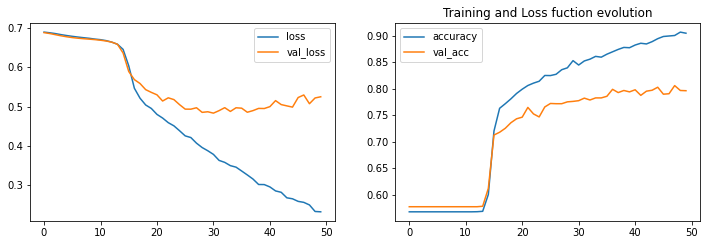

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D, Dropout, SpatialDropout1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def plot_loss_evaluation(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_acc')
    plt.legend()
    
    plt.title('Training and Loss fuction evolution')
    
def evaluate(model, X_train, X_test, y_train, y_test):
    y_pred_train = np.round(model.predict(X_train))
    y_pred_test = np.round(model.predict(X_test))
    
    print("=============Training Data===============")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))
    print(f"Accuracy score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
    
    print("=============Testing Data===============")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
    
data = pd.read_csv("train_logistic_regression.csv")

print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('==============Convert Sentences to Sequences================')
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, char_level=False)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# pad sequence do that we get a NxT matrix
data_train = pad_sequences(sequences_train)
data_test = pad_sequences(sequences_test, maxlen=data_train.shape[1])
print(f"Found {len(tokenizer.word_index)} unique tokens.")
print(f"Training Data shape: {data_train.shape}")
print(f"Testing Data shape: {data_test.shape}")

print('===============Create The Model==========================')
# We get to choose embedding dimensionality
D = 100
# Hidden state dimentionality
M = 64
V = len(tokenizer.word_index)
T = data_train.shape[1]

# model.add(embedding)
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = SpatialDropout1D(0.2)(x)
x = LSTM(M, return_sequences=True, activation='relu')(x)
x = GlobalAveragePooling1D()(x)
# x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
optimizer = Adam(learning_rate=1e-5)
# Compile and fit
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print('Training model...........')
r = model.fit(data_train, y_train, epochs=50, 
              validation_data=(data_test, y_test), 
              batch_size=16)

print('================Model Evaluation=====================')
evaluate(model, data_train, data_test, y_train, y_test)
plot_loss_evaluation(r)


In [21]:
data.text.str.len()

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

# Convolutional Neural Networks

=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)
==============Convert Sentences to Sequences================
Found 17762 unique tokens.
Training Data shape: (5329, 33)
Testing Data shape: (2284, 33)
===============Create The Model==========================
Training model...........
Epoch 1/5
5329/5329 [==============================] - 80s 15ms/step - loss: 0.6293 - accuracy: 0.6585 - val_loss: 0.4879 - val_accuracy: 0.7903
Epoch 2/5
5329/5329 [==============================] - 79s 15ms/step - loss: 0.3595 - accuracy: 0.8641 - val_loss: 0.4875 - val_accuracy: 0.7955
Epoch 3/5
5329/5329 [==============================] - 79s 15ms/step - loss: 0.2263 - accuracy: 0.9212 - val_loss: 0.7037 - val_accuracy: 0.7320
Epoch 4/5
5329/5329 [==============================] - 79s 15ms/step - loss: 0.1552 - accuracy: 0.9479 - val_loss: 0.5396 - val_accuracy: 0.7754
Epoch 5/5
5329/5329 [=====

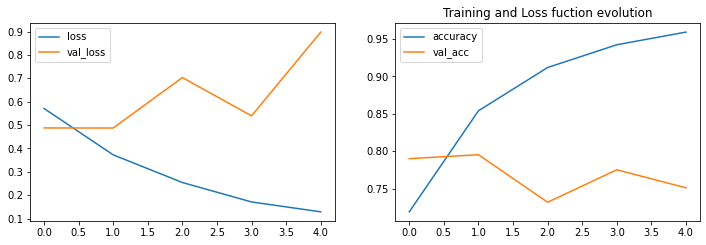

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import Conv1D, Embedding, Dropout
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def plot_loss_evaluation(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_acc')
    plt.legend()
    
    plt.title('Training and Loss fuction evolution')
    
def evaluate(model, X_train, X_test, y_train, y_test):
    y_pred_train = np.round(model.predict(X_train))
    y_pred_test = np.round(model.predict(X_test))
    
    print("=============Training Data===============")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))
    print(f"Accuracy score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
    
    print("=============Testing Data===============")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
    
data = pd.read_csv("train_logistic_regression.csv")

print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('==============Convert Sentences to Sequences================')
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# pad sequence do that we get a NxT matrix
data_train = pad_sequences(sequences_train)
data_test = pad_sequences(sequences_test, maxlen=data_train.shape[1])
print(f"Found {len(tokenizer.word_index)} unique tokens.")
print(f"Training Data shape: {data_train.shape}")
print(f"Testing Data shape: {data_test.shape}")

print('===============Create The Model==========================')
# We get to choose embedding dimensionality
D = 100

V = len(tokenizer.word_index)
T = data_train.shape[1]

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)

x = Conv1D(32, 2, activation='relu')(x)
x = MaxPooling1D()(x)
x = Dropout(0.1)(x)

x = Conv1D(64, 2, activation='relu')(x)
x = MaxPooling1D()(x)
x = Dropout(0.2)(x)

x = Conv1D(128, 2, activation='relu')(x)
x = MaxPooling1D()(x)
x = Dropout(0.3)(x)

x = Conv1D(264, 2, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dropout(0.5)(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile and fit
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training model...........')
r = model.fit(data_train, y_train, epochs=5, 
              validation_data=(data_test, y_test), 
              batch_size=1)

print('================Model Evaluation=====================')
evaluate(model, data_train, data_test, y_train, y_test)
plot_loss_evaluation(r)

# NLTK Sentiment VADER

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
data['scores'] = data['text'].apply(lambda text: sid.polarity_scores(text))
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 0 if c >= 0 else 1)

In [24]:
accuracy_score(data['target'], data['comp_score'])

0.5724418757388677

#  Making submission

In [25]:
# /kaggle/input/nlp-getting-started/test.csv
# /kaggle/input/nlp-getting-started/sample_submission.csv
test = pd.read_csv('test.csv')

print('==============Convert Sentences to Sequences================')
sequences_test = tokenizer.texts_to_sequences(test.text)

# pad sequence do that we get a NxT matrix
data_test = pad_sequences(sequences_test, maxlen=data_train.shape[1])
print(f"Found {len(tokenizer.word_index)} unique tokens.")
print(f"Testing Data shape: {data_test.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
sample_sub=pd.read_csv('sample_submission.csv')
y_pre = model.predict(data_test)
y_pre = np.round(y_pre).astype(int).reshape(3263)
sub = pd.DataFrame({'id':sample_sub['id'].values.tolist(), 'target':y_pre})
sub.to_csv('submission.csv', index=False)

In [ ]:
sub.head()